In [1]:
from BFCalc.BFInterp import DM_spectrum_setup
from utils import log10eaxis, makedist, logjacob, edisp
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
from matplotlib import cm
from tqdm.autonotebook import tqdm as notebook_tqdm

/Users/lpin0002/anaconda3/envs/please/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
logmassaxis = np.linspace(-1.,1,64)
colormap = cm.get_cmap('cool')

/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_69787/1013102476.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('cool')


In [7]:
spectravals = []
for logmass in notebook_tqdm(logmassaxis):
    tempfunc = DM_spectrum_setup(logmass, normeaxis=10**log10eaxis)
    
    singlerowspecvals = tempfunc(log10eaxis)
    
    spectravals.append(singlerowspecvals)
spectravals = np.array(spectravals)

100%|██████████| 64/64 [00:06<00:00,  9.62it/s]


In [8]:
print(special.logsumexp(spectravals[1,:]+logjacob))

0.06879976910245711


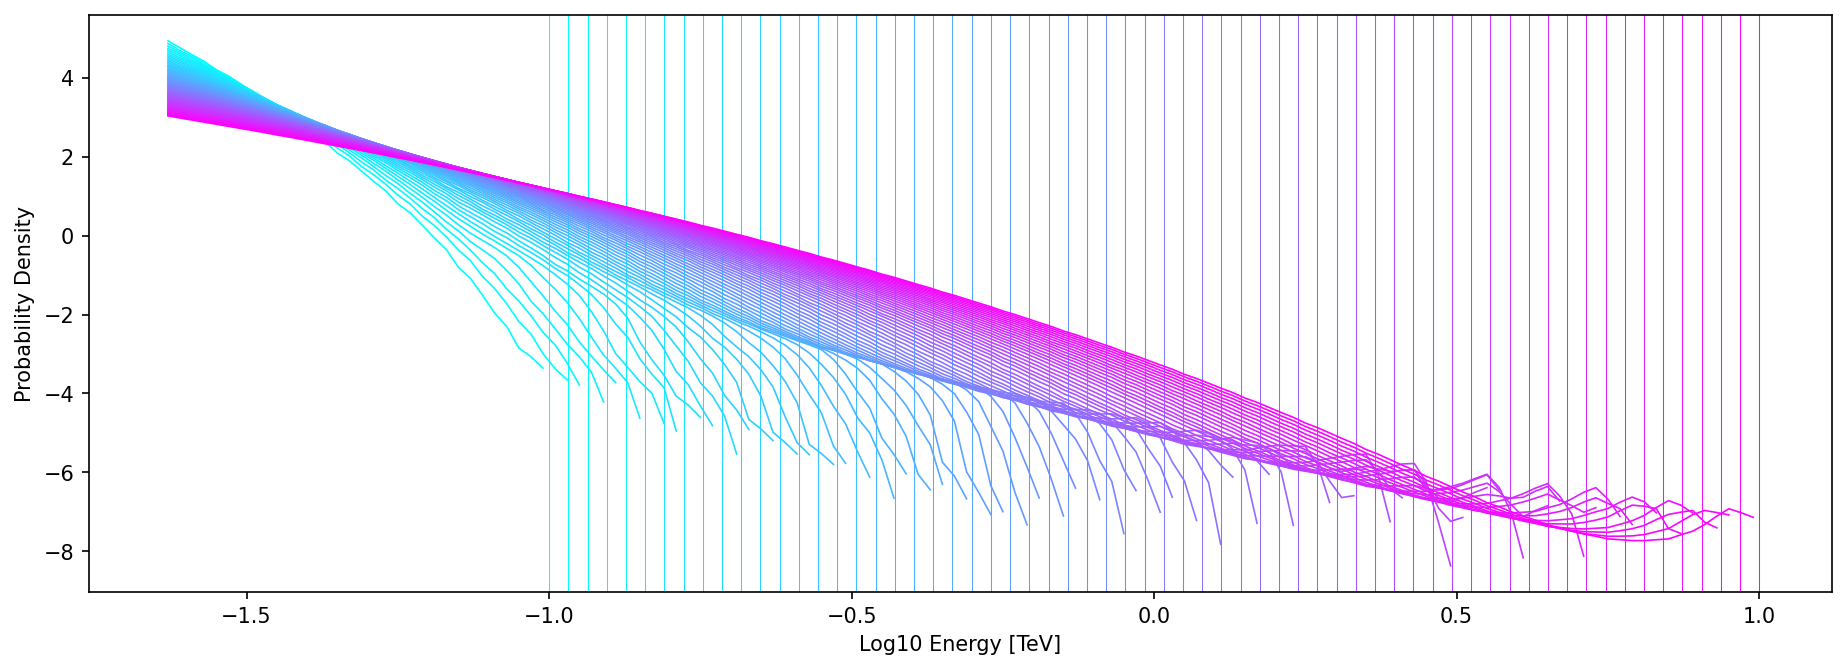

In [9]:
plt.figure(dpi=150, figsize=(15,5))
# plt.pcolormesh(log10eaxis, logmassaxis, spectravals, label=logmass, lw=0.8)
logjacob = np.log(np.log(10))+np.log(log10eaxis[1]-log10eaxis[0])+np.log(10**log10eaxis)
for logmass in logmassaxis:
    color = colormap(np.where(logmassaxis==logmass)[0]/logmassaxis.shape[0])
    spectravalstemp = np.array(spectravals).T[:,np.where(logmassaxis==logmass)[0]]
    plt.plot(log10eaxis, spectravalstemp, label=special.logsumexp(spectravalstemp.T+logjacob), color=color, lw=0.8)
    plt.axvline(logmass, c=color, lw=0.5, linestyle='-')
plt.xlabel('Log10 Energy [TeV]')
plt.ylabel('Probability Density')
# plt.yscale('log')
# plt.xlim([0.9*logmassaxis[0], 1.1*logmassaxis[-1]])
# plt.legend()
plt.show()

In [65]:
logmassaxis[logmassaxis==logmass]

array([1.])

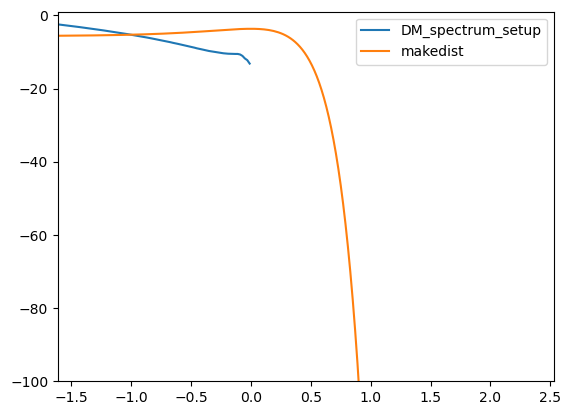

In [66]:
plt.figure()
plt.plot(log10eaxis, DM_spectrum_setup(0.0, normeaxis=10**log10eaxis)(log10eaxis)-special.logsumexp(DM_spectrum_setup(0.0, normeaxis=10**log10eaxis)(log10eaxis)), 
         label='DM_spectrum_setup')
plt.plot(log10eaxis, makedist(0.0, normeaxis=10**log10eaxis)(log10eaxis)-special.logsumexp(makedist(0.0, normeaxis=10**log10eaxis)(log10eaxis)), 
         label='makedist')

plt.xlim([log10eaxis[0], log10eaxis[-1]])
plt.ylim([-100,1])
plt.legend()

In [14]:
special.logsumexp(DM_spectrum_setup(0.0, normeaxis=10**log10eaxis)(log10eaxis)+np.log(np.log(10))+np.log(10**log10eaxis)+np.log(log10eaxis[1]-log10eaxis[0]))

0.0


0.0